# 🪄 Convolution using Wezney/Tabular Method

## 📦 Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 📝 Input Signals

In [6]:
# Input signal x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] | Origin at 0th index
x = np.arange(1, 11)
x_origin = 3

# Impulse response h = [1, 2, 3, 4, 5] | Origin at 2nd index
h = np.arange(1, 6)
h_origin = 2

## 📅 Creating the 2D table

In [7]:
# Creating the table with shape (len(h), len(x))
y = np.ndarray(shape=(len(h), len(x)))
y.fill(0)
for i in range(len(x)):
    for j in range(len(h)):
        y[j][i] = h[j] * x[i]

print(f"Multiplied Matrix: {y}")

Multiplied Matrix: [[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [ 2.  4.  6.  8. 10. 12. 14. 16. 18. 20.]
 [ 3.  6.  9. 12. 15. 18. 21. 24. 27. 30.]
 [ 4.  8. 12. 16. 20. 24. 28. 32. 36. 40.]
 [ 5. 10. 15. 20. 25. 30. 35. 40. 45. 50.]]


## ➕ Summing the values diagonally

In [8]:
# Summing the values diagonally
sums = np.zeros(len(x) + len(h) - 1)
for i in range(len(x) + len(h) - 1):
    for j in range(len(h)):
        if 0 <= i-j < len(x):
            sums[i] += y[j][i-j]

result_origin = x_origin + h_origin
print(f"Summed Signal: {sums}\n\nOrigin: {result_origin}th index [value: {sums[result_origin]}]")

Summed Signal: [  1.   4.  10.  20.  35.  50.  65.  80.  95. 110. 114. 106.  85.  50.]

Origin: 5th index [value: 50.0]


## 📊 Plotting the results

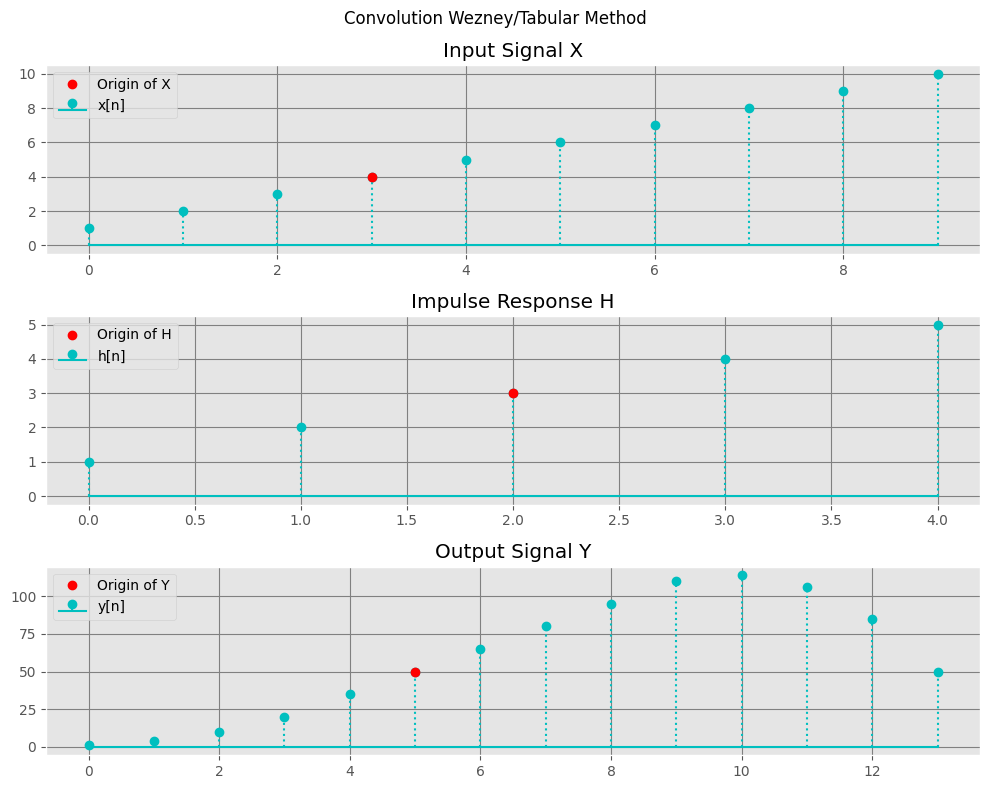

In [9]:
# Create a figure with 3 subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 8))
plt.suptitle("Convolution Wezney/Tabular Method", color='black')
plt.style.use('ggplot')
plt.rcParams['grid.color'] = 'grey'

def plot_signal(ax, signal, origin, title, legend, origin_legend="Origin"):
    ax.stem(signal, linefmt='c:', markerfmt='co', basefmt='c-')
    ax.set_title(title, color='black')
    ax.plot(origin, signal[origin], 'ro')
    ax.legend([origin_legend, legend], labelcolor='black')
    ax.grid(True)

# Plot the input signal
plot_signal(axs[0], x, x_origin, "Input Signal X", "x[n]", "Origin of X")
# Plot the impulse response
plot_signal(axs[1], h, h_origin, "Impulse Response H", "h[n]", "Origin of H")
# Plot the output signal
plot_signal(axs[2], sums, result_origin, "Output Signal Y", "y[n]", "Origin of Y")

plt.tight_layout()
plt.show()